# Credit Risk Modelling: Project
Antoni Ballaun, Laura Hoang, Jędrzej Joniec, Piotr Zambrzycki

## 02. Data preparation: finding correlations

In [120]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [121]:
#%cd "C:\Users\zambr\Desktop\Studia\Semestr 2\Modelowanie ryzyka kredytowego\projekt\MRK-projekt-main"

In [122]:
df = pd.read_csv('filled_missings_df.csv',index_col=0)

In [123]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Defaulted
0,1021339766868145413AB3B,193129,13751.0,36,Completed,0.16516,0.1580,0.1380,0,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,0
1,10273602499503308B223C1,1209647,16128.0,36,Current,0.12016,0.0920,0.0820,2,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
2,0EE9337825851032864889A,81716,13518.0,36,Completed,0.28269,0.2750,0.2400,0,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,0
3,0EF5356002482715299901A,658116,15635.0,36,Current,0.12528,0.0974,0.0874,16,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0
4,0F023589499656230C5E3E2,909464,15962.0,36,Current,0.24614,0.2085,0.1985,2,MN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,0


In [124]:
pointless_cols = ['ListingKey','ListingNumber', 'LoanNumber', 'LoanStatus', 'MemberKey', 'LoanKey']

In [125]:
df = df.drop(pointless_cols,axis=1)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114805 entries, 0 to 114804
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingCreationDate                 114413 non-null  float64
 1   Term                                114805 non-null  int64  
 2   BorrowerAPR                         114805 non-null  float64
 3   BorrowerRate                        114805 non-null  float64
 4   LenderYield                         114805 non-null  float64
 5   ListingCategory (numeric)           114805 non-null  int64  
 6   BorrowerState                       114805 non-null  object 
 7   EmploymentStatus                    114805 non-null  object 
 8   EmploymentStatusDuration            114805 non-null  float64
 9   IsBorrowerHomeowner                 114805 non-null  int64  
 10  CurrentlyInGroup                    114805 non-null  int64  
 11  DateCreditPulled               

<Axes: xlabel='Defaulted', ylabel='percent'>

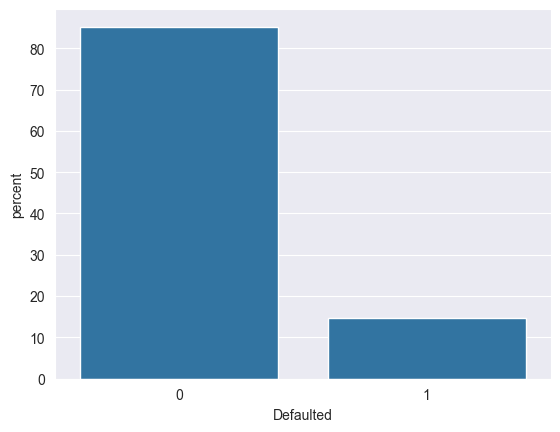

In [127]:
sns.countplot(data=df,x='Defaulted', stat='percent',)

In [128]:
df.columns

Index(['ListingCreationDate', 'Term', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ListingCategory (numeric)', 'BorrowerState',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'LoanOriginalAm

In [129]:
len(df.columns)

56

In [130]:
continuous_variables  = [
    'ListingNumber', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
    'EstimatedLoss', 'EstimatedReturn', 'EmploymentStatusDuration', 'OpenRevolvingMonthlyPayment', 'AmountDelinquent',
    'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)',
    'ProsperPrincipalBorrowed', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'ProsperPrincipalOutstanding',
    'MonthlyLoanPayment', 'ScorexChangeAtTimeOfListing', 'LoanOriginalAmount', 'LP_CustomerPayments',
    'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss',
    'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'InvestmentFromFriendsAmount', 'PercentFunded'
]


discrete_variables  = [
    'Term', 'CreditScoreRangeLower',
    'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
    'OpenRevolvingAccounts', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
    'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'ProsperScore',
    'TotalTrades', 'TradesOpenedLast6Months', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
    'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
    'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
    'Recommendations', 'InvestmentFromFriendsCount', 'Investors', 'ListingCategory (numeric)',
    'ProsperRating (numeric)', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled',
    'IncomeVerifiable', 'LoanOriginationDate', 'FirstRecordedCreditLine', 'ClosedDate', 'ListingCreationDate'
]


categorical_variables = [
    'ListingKey', 'CreditGrade', 'LoanStatus',
    'ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
    'GroupKey', 'IncomeRange', 'LoanKey',
    'LoanOriginationQuarter', 'MemberKey', 'LoanNumber'
]

Rysuję violiny dla: ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EmploymentStatusDuration', 'OpenRevolvingMonthlyPayment', 'AmountDelinquent', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'InvestmentFromFriendsAmount', 'PercentFunded', 'Term', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'TotalTrades', 'TradesOpenedLast6Months', 'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination', 'Recommendations', 'In

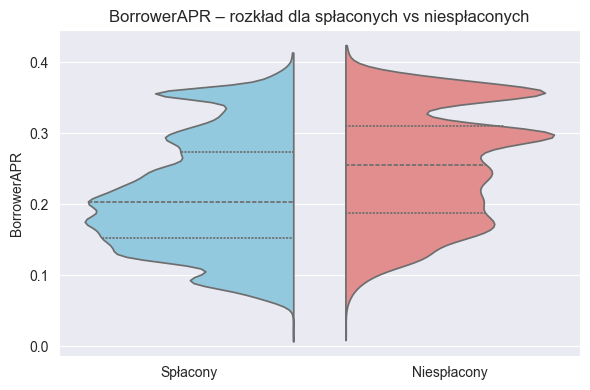

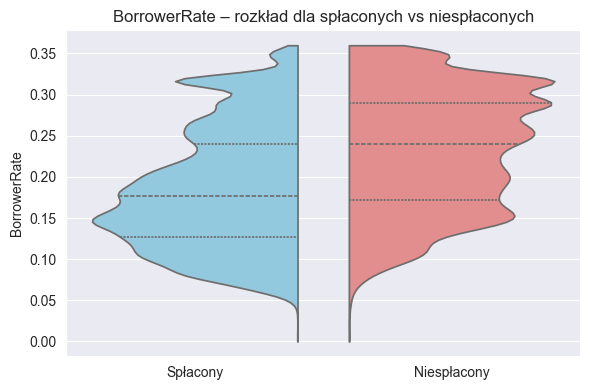

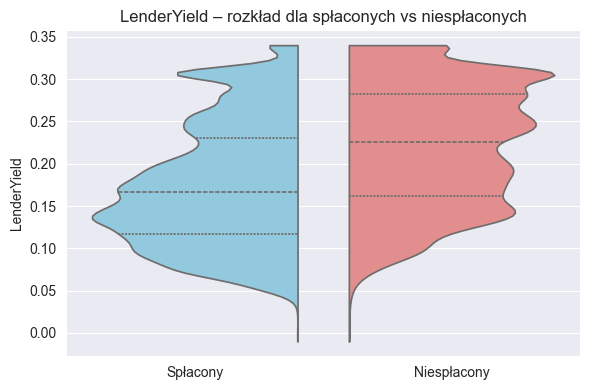

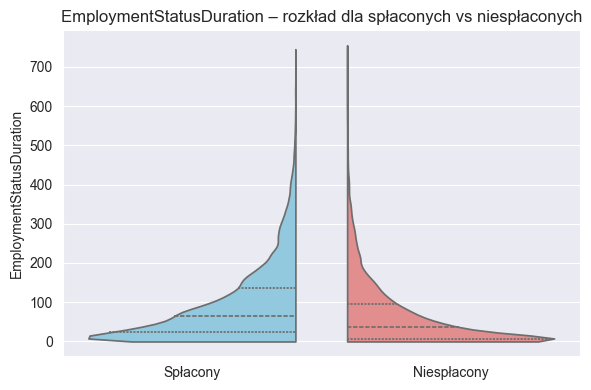

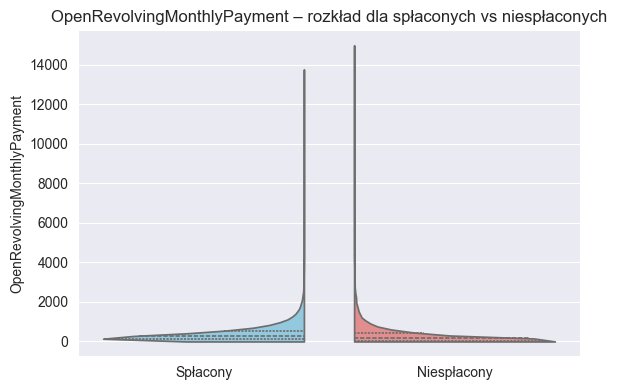

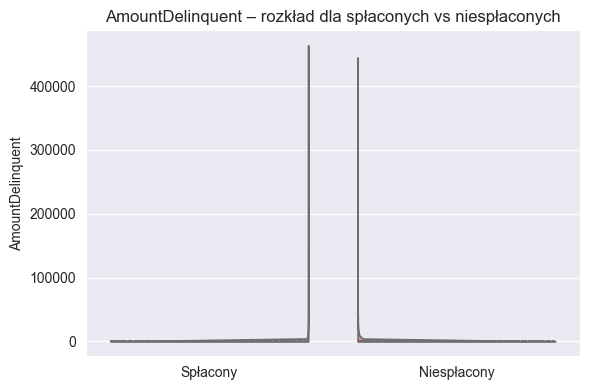

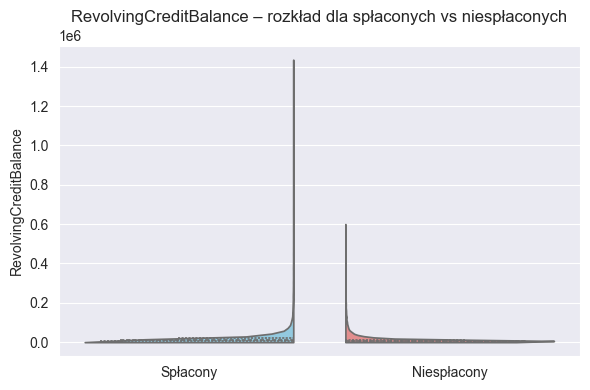

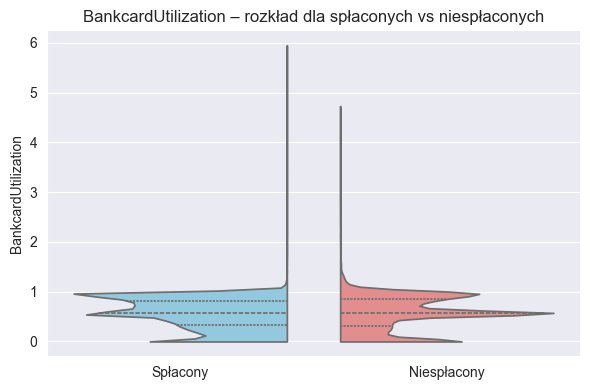

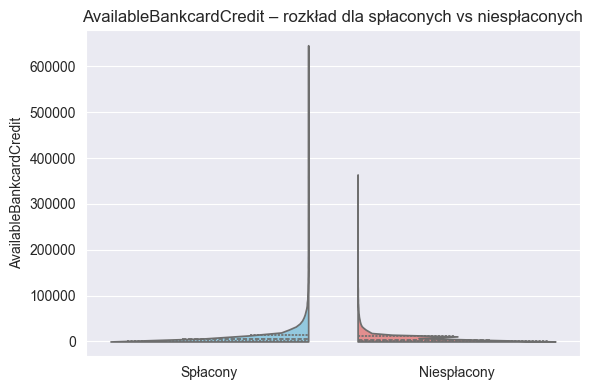

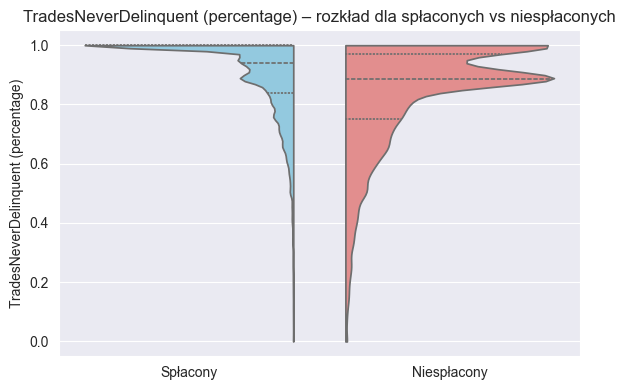

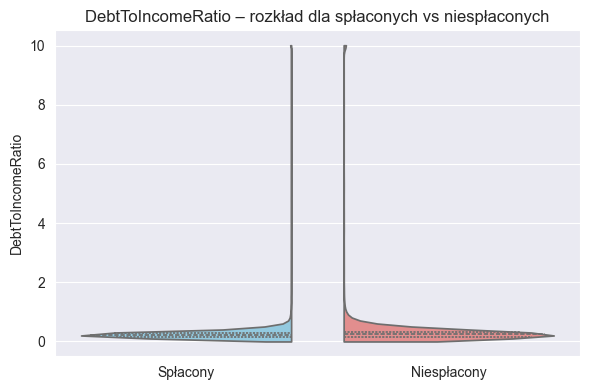

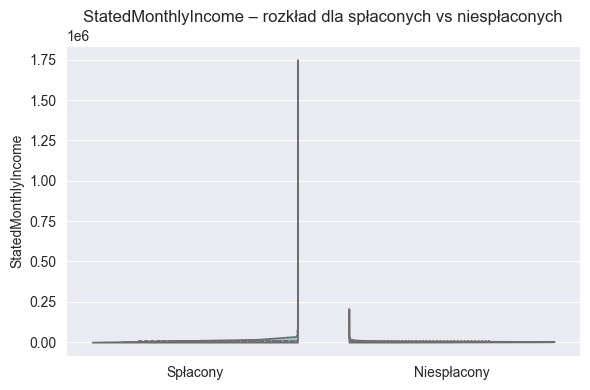

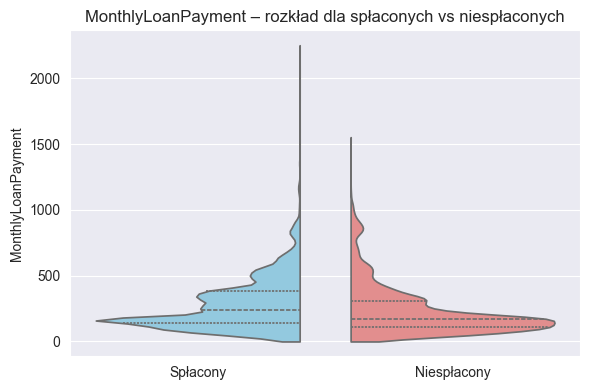

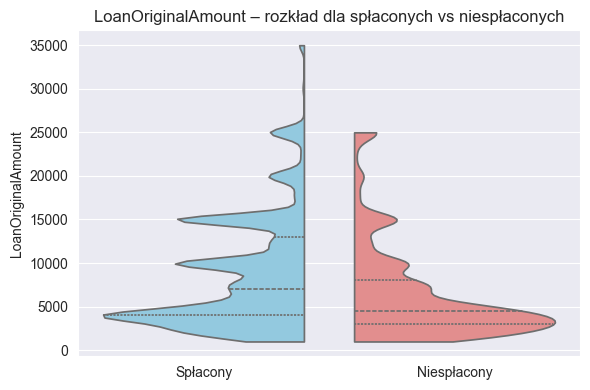

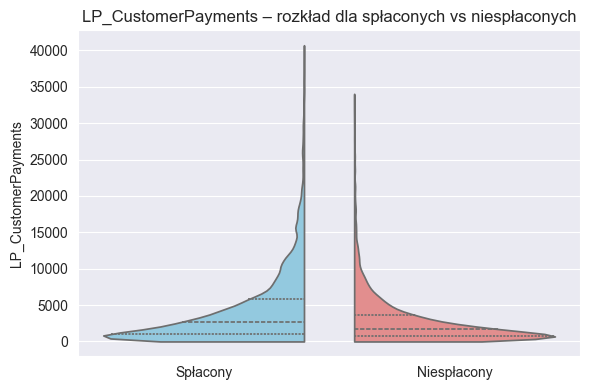

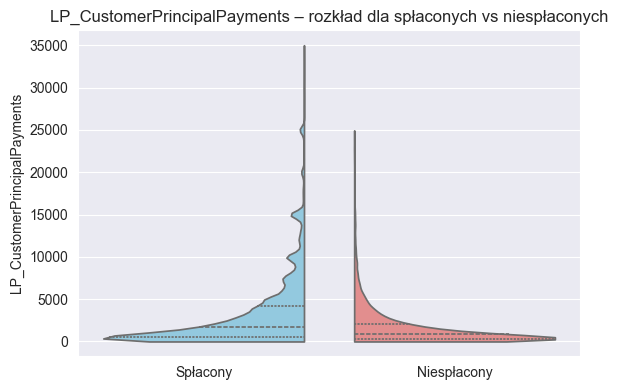

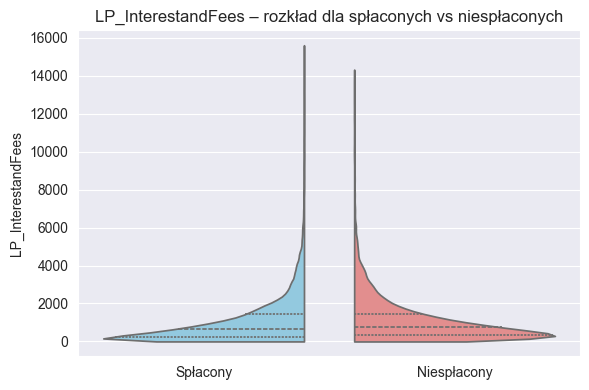

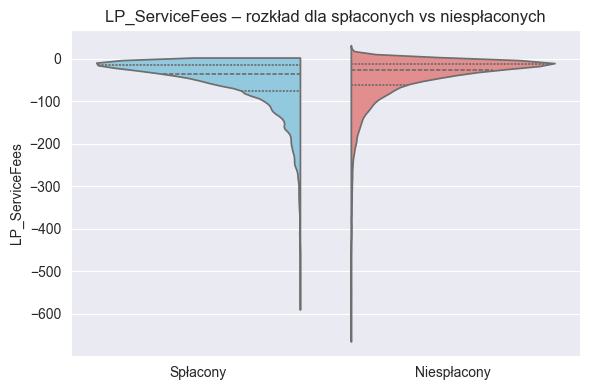

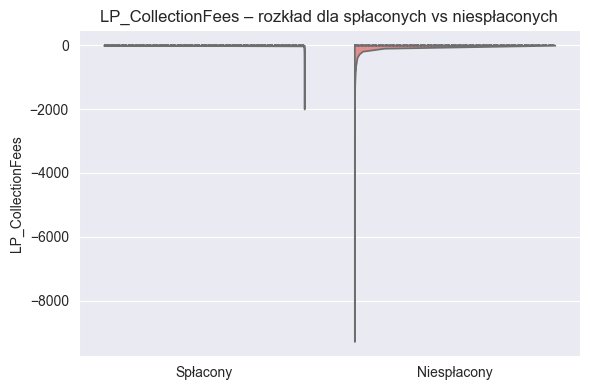

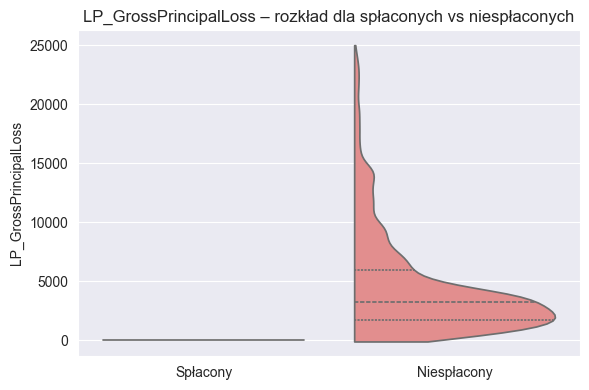

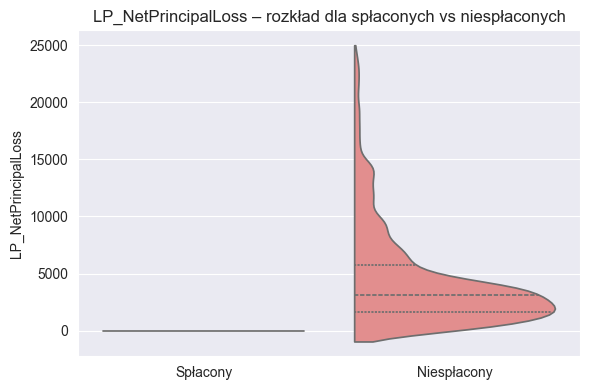

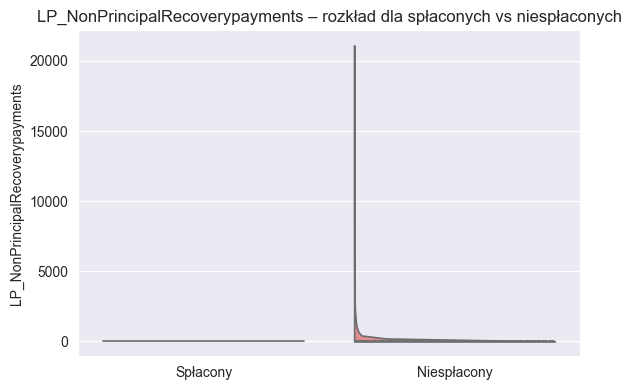

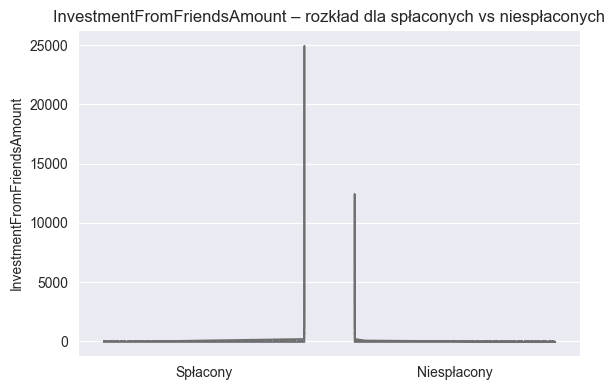

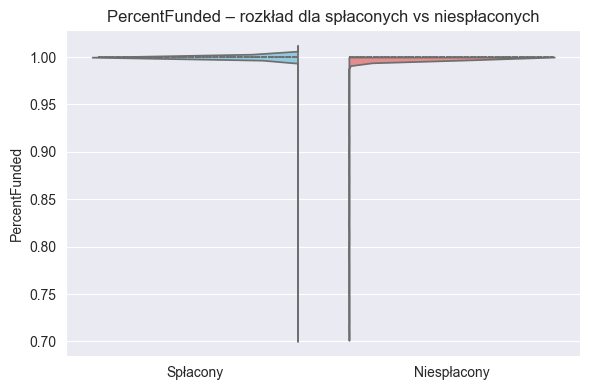

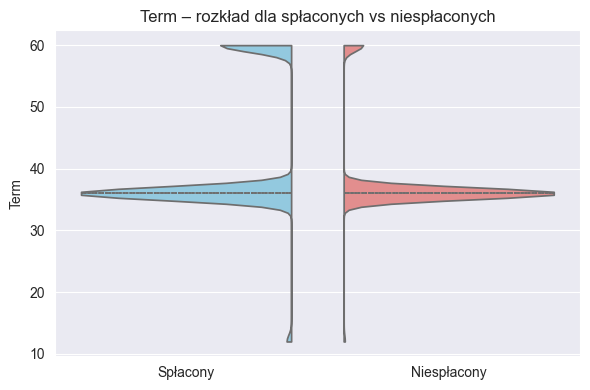

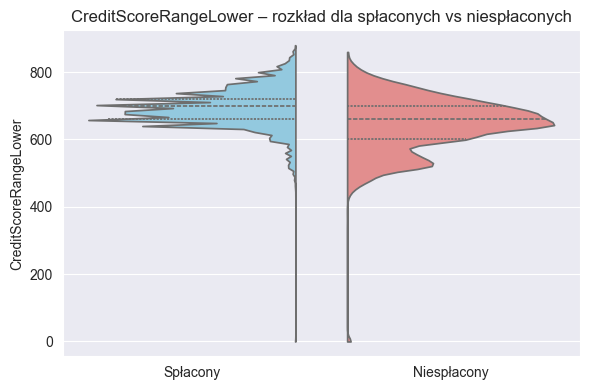

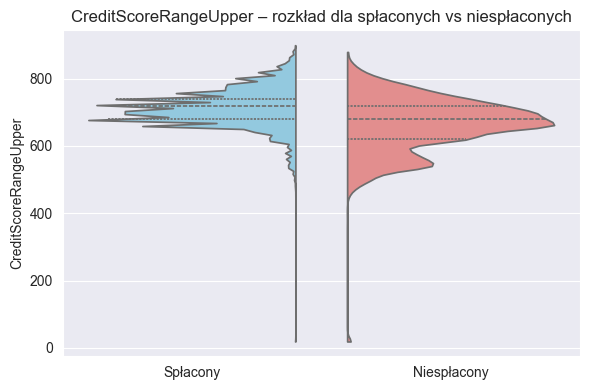

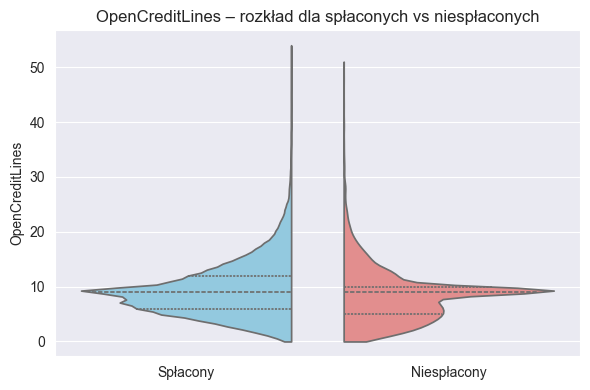

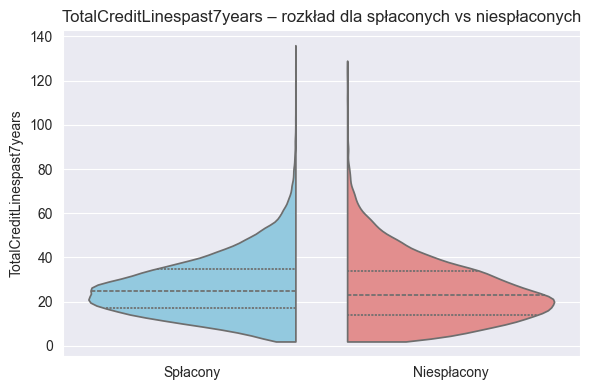

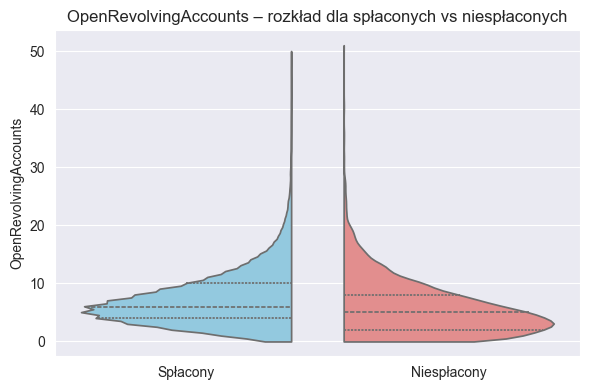

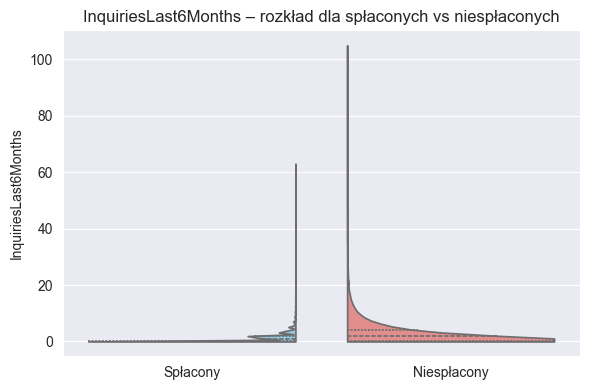

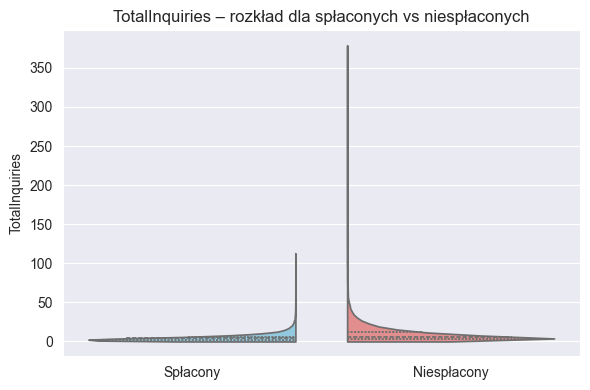

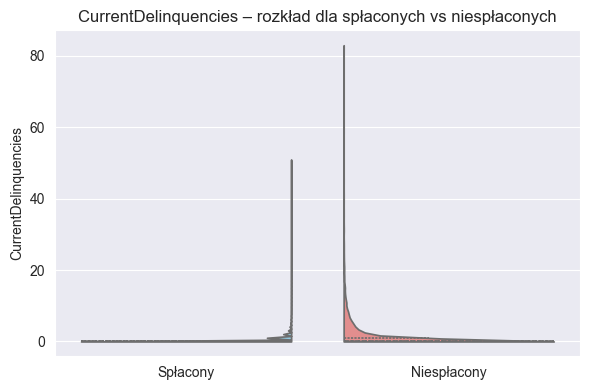

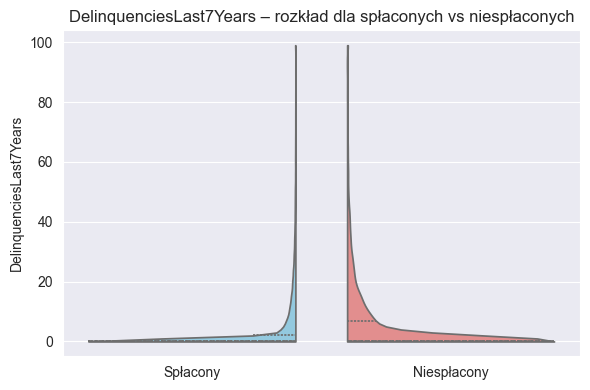

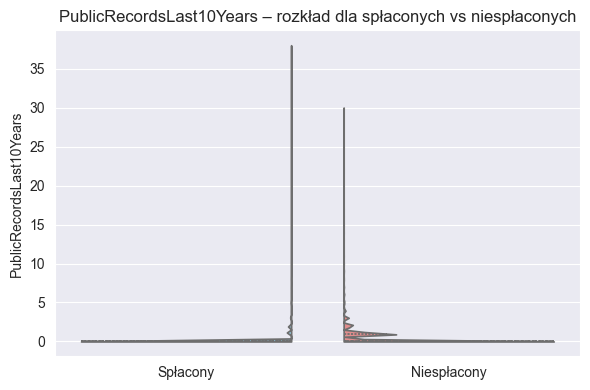

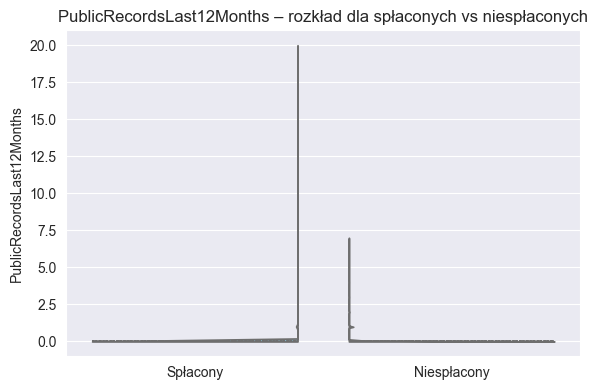

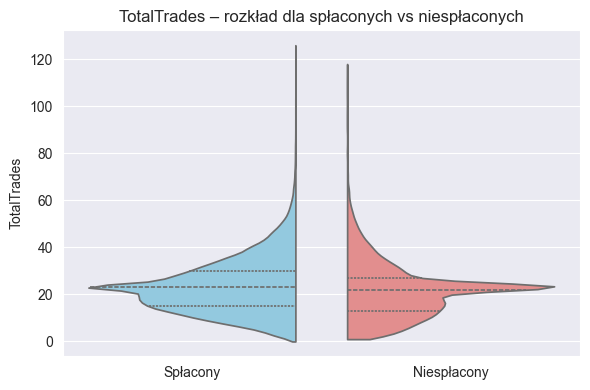

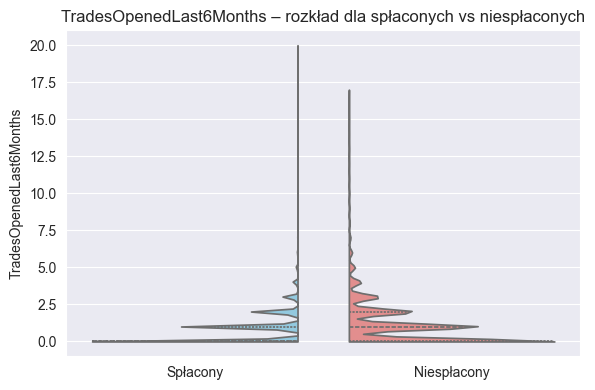

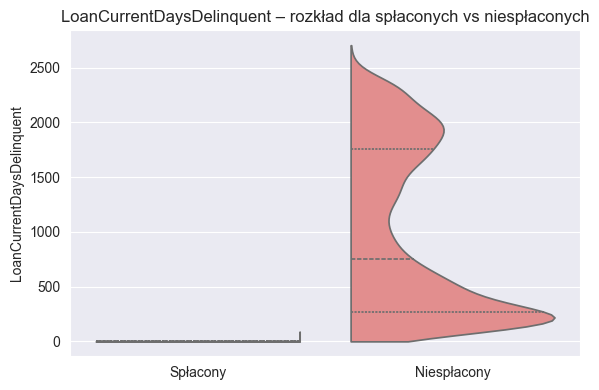

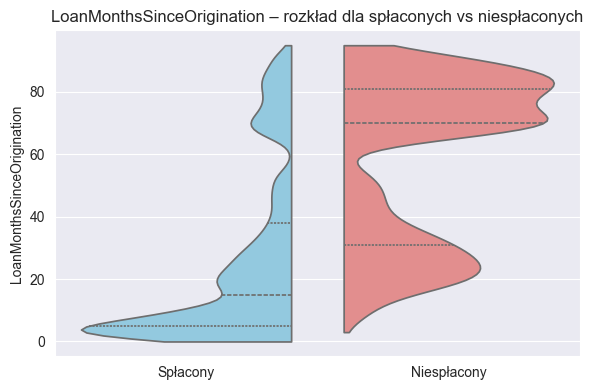

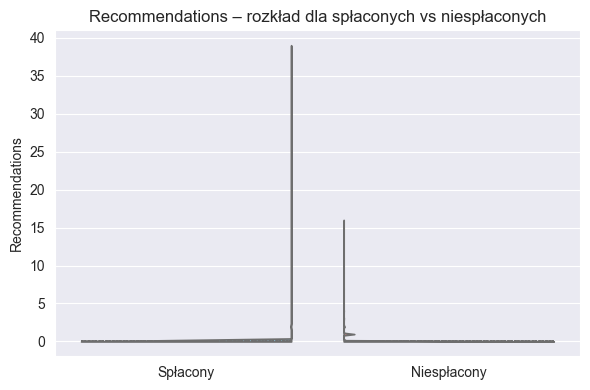

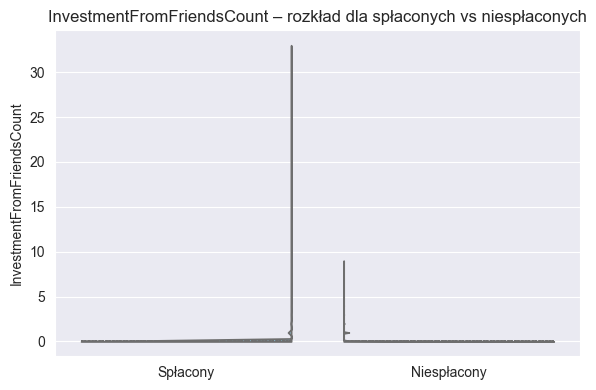

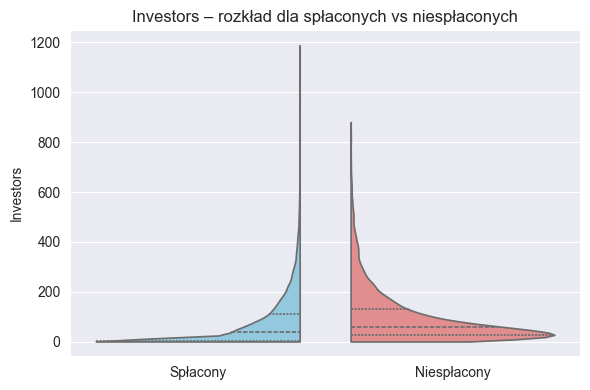

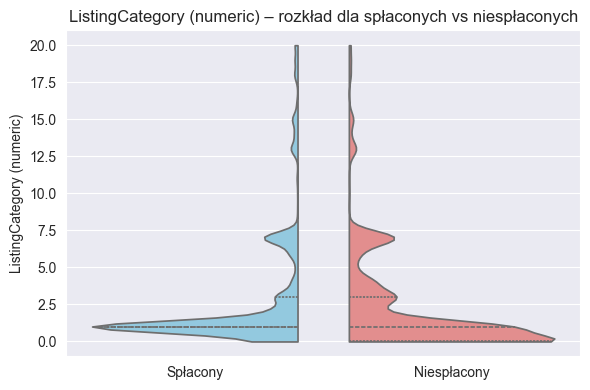

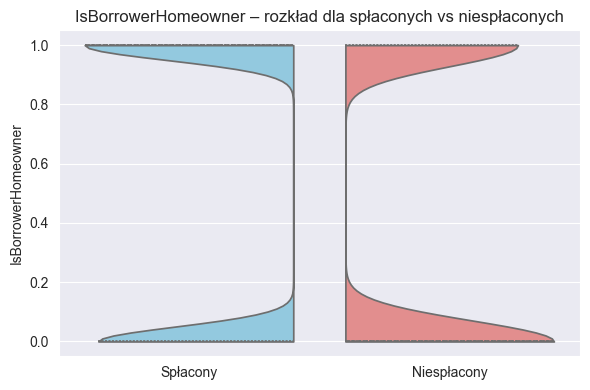

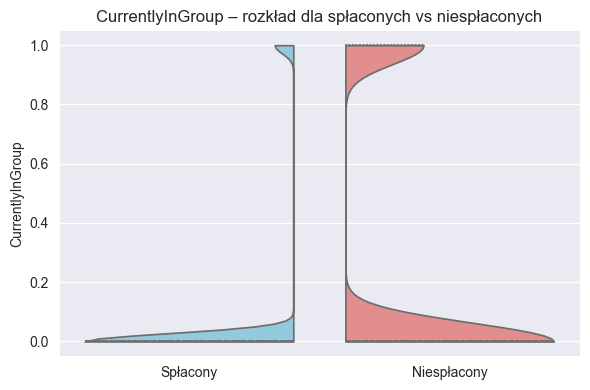

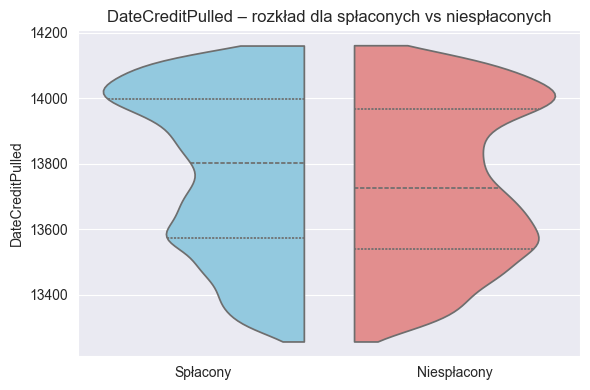

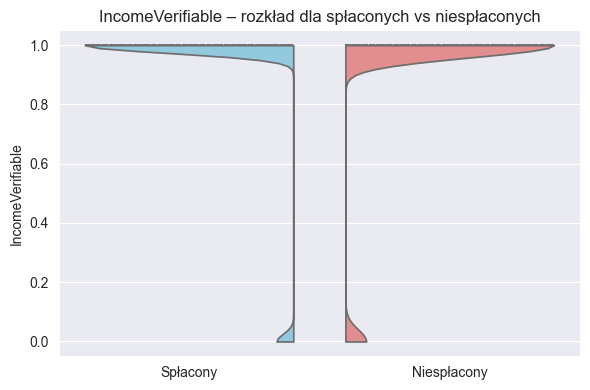

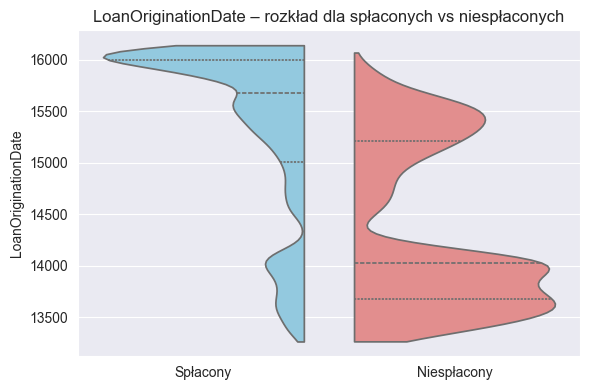

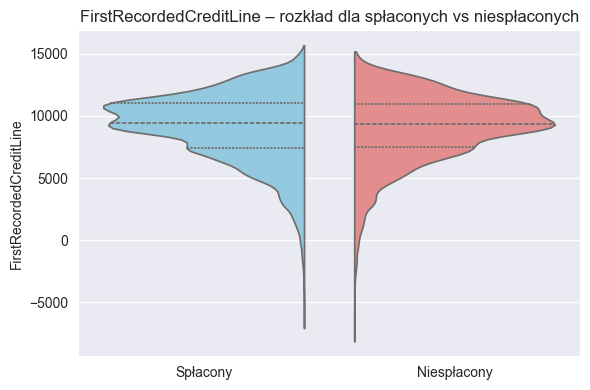

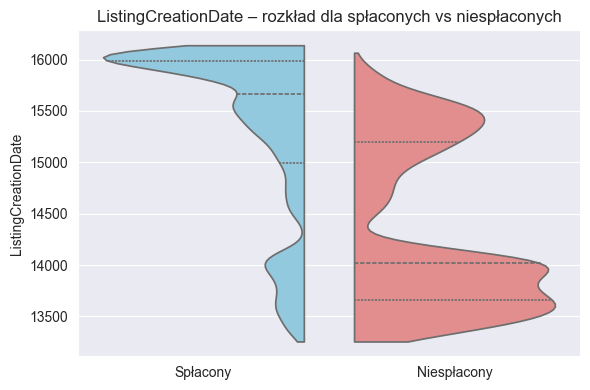

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Przygotowanie opisowej etykiety
df['Defaulted_label'] = df['Defaulted'].map({0: 'Spłacony', 1: 'Niespłacony'})

# 2) Definicja kolumn, które chcemy pominąć (ID + target)
id_cols = ['ListingKey', 'LoanKey', 'MemberKey', 'LoanNumber']
exclude = set(id_cols + ['Defaulted'])

# 3) Lista kolumn numerycznych do wizualizacji

numeric_cols = [col for col in (continuous_variables + discrete_variables) if col in df.columns]

print("Rysuję violiny dla:", numeric_cols)


print("Rysuję violiny dla:", numeric_cols)

# 4) Pętla po cechach
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(
        data=df,
        x='Defaulted_label',
        y=col,
        palette=['skyblue','lightcoral'],
        split=True,       # jedna połówka = jedna grupa
        inner='quartile', # kreski Q1–median–Q3
        cut=0             # ucina wąsy poza zakresem rzeczywistych danych
    )
    plt.title(f'{col} – rozkład dla spłaconych vs niespłaconych')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

Pomiń BorrowerState: za dużo unikalnych wartości (51)


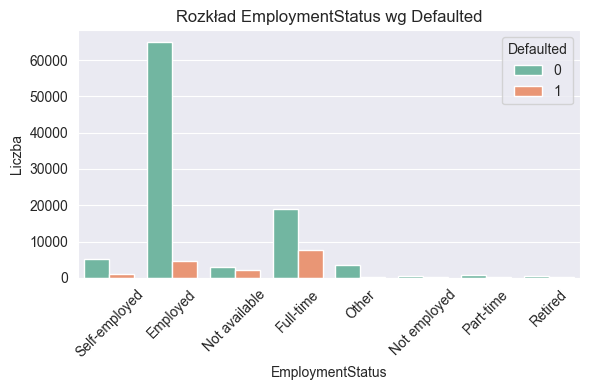

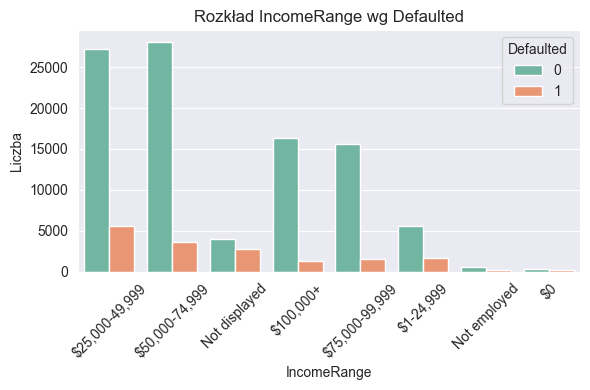

Pomiń LoanOriginationQuarter: za dużo unikalnych wartości (31)


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rysowanie wykresów słupkowych
for col in categorical_variables:
    if col in df.columns:
        unique_vals = df[col].nunique()
        missing_pct = df[col].isna().mean() * 100

        if unique_vals > 30:
            print(f"Pomiń {col}: za dużo unikalnych wartości ({unique_vals})")
            continue

        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, hue='Defaulted', palette='Set2')
        plt.title(f'Rozkład {col} wg Defaulted')
        plt.xlabel(col)
        plt.ylabel('Liczba')
        plt.legend(title='Defaulted')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [133]:
dataset = df
dataframe = dataset[numeric_cols]
dataframe["target"] = dataset.Defaulted
matrix = dataframe.corr();

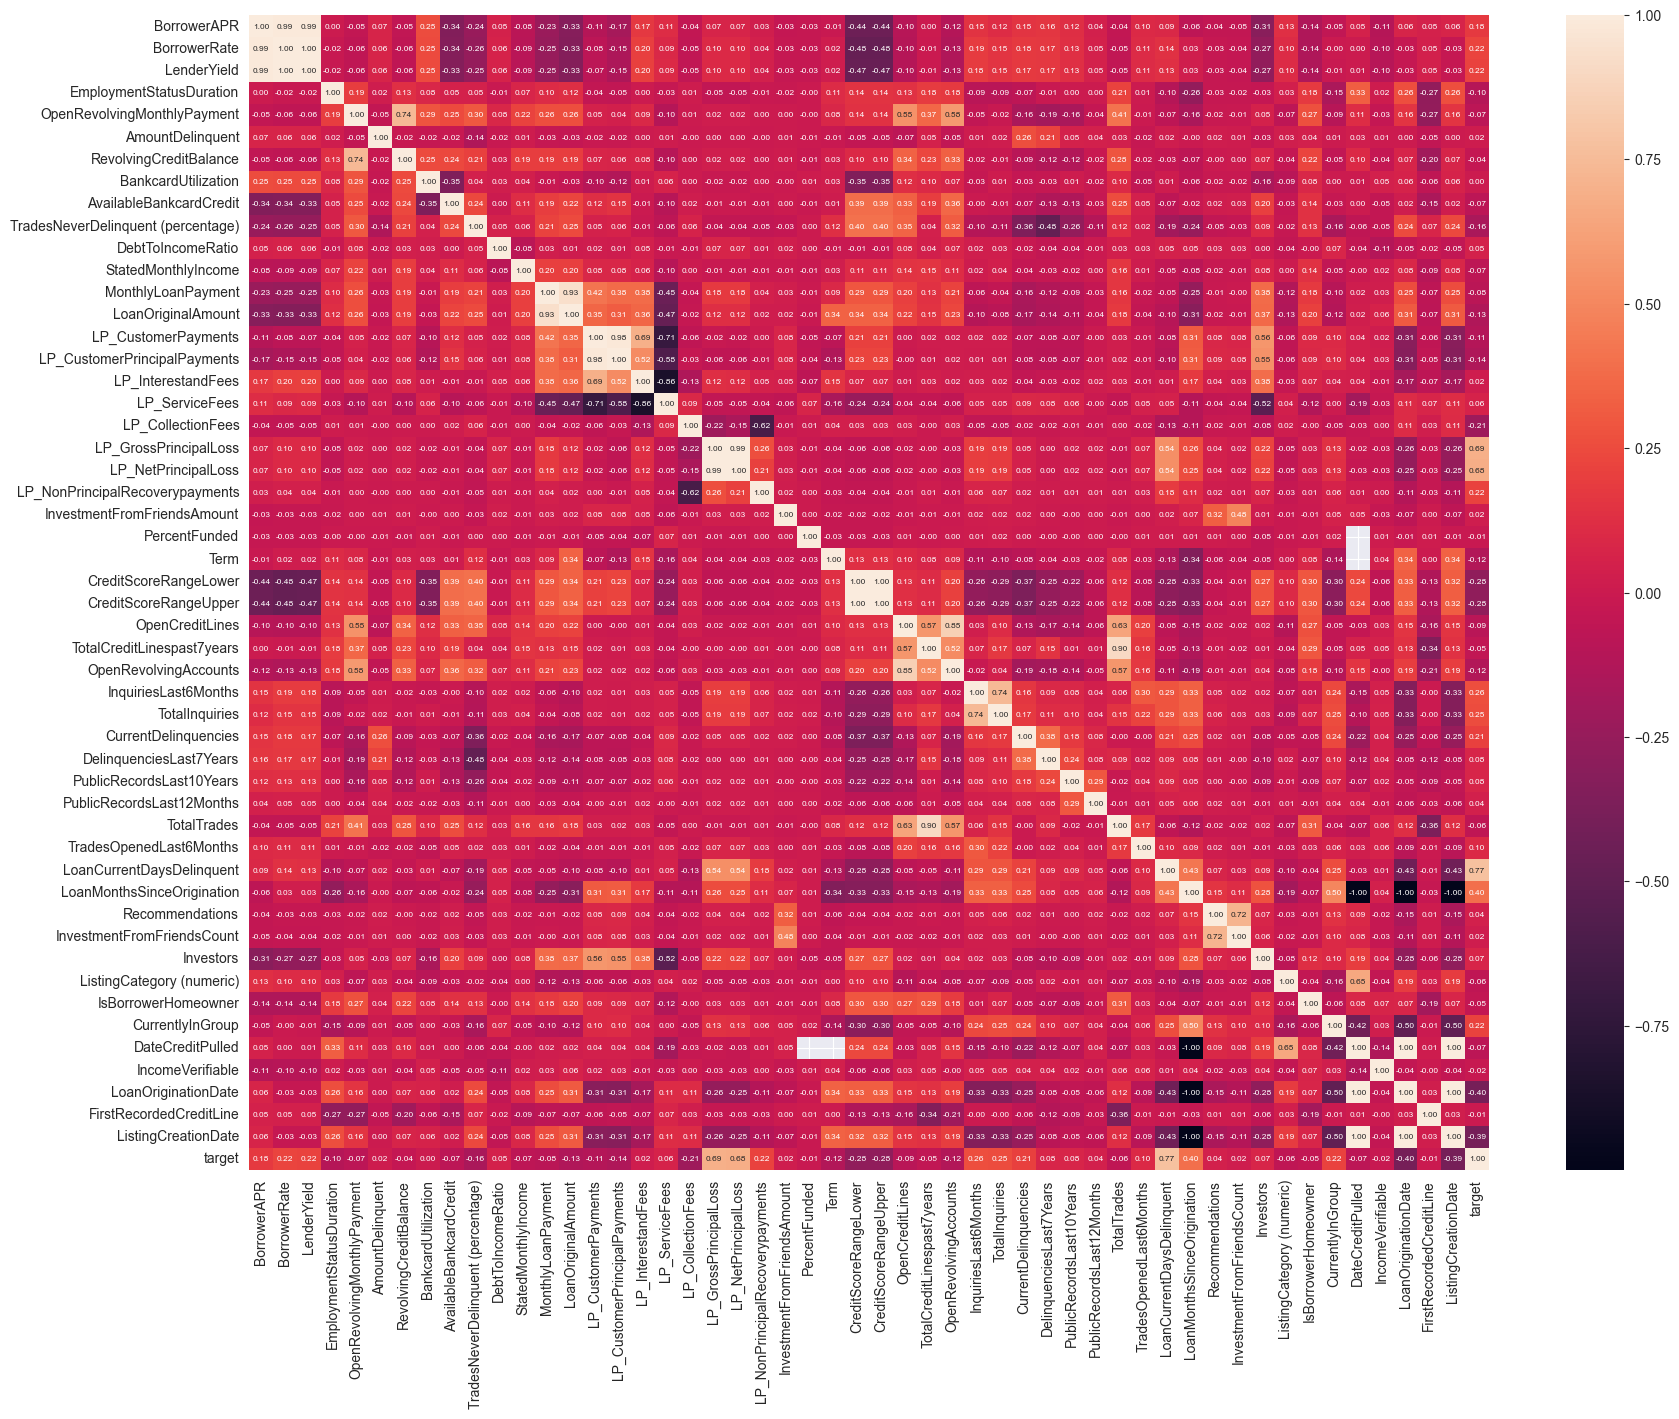

In [134]:
plt.figure(figsize=(20, 15))
# sns.heatmap(matrix, xticklabels=matrix.columns.values, yticklabels=matrix.columns.values, annot=False);
sns.heatmap(matrix, xticklabels=matrix.columns.values, yticklabels=matrix.columns.values, annot=True, fmt='.2f', annot_kws={"size":6});
plt.show()

In [135]:
# EDA - Eksploracyjna Analiza Danych
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline


In [136]:
# Wczytaj dane
df = pd.read_csv("filled_missings_df.csv")

# Podgląd danych
display(df.head())
print("\nRozmiar danych:", df.shape)


,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Defaulted
0,0,1021339766868145413AB3B,193129,13751.0,36,Completed,0.16516,0.1580,0.1380,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,0
1,1,10273602499503308B223C1,1209647,16128.0,36,Current,0.12016,0.0920,0.0820,2,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
2,2,0EE9337825851032864889A,81716,13518.0,36,Completed,0.28269,0.2750,0.2400,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,0
3,3,0EF5356002482715299901A,658116,15635.0,36,Current,0.12528,0.0974,0.0874,16,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0
4,4,0F023589499656230C5E3E2,909464,15962.0,36,Current,0.24614,0.2085,0.1985,2,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,0



Rozmiar danych: (114805, 63)


,Liczba brakujących,Procent brakujących
DateCreditPulled,86977,75.760638
ListingCreationDate,392,0.341449


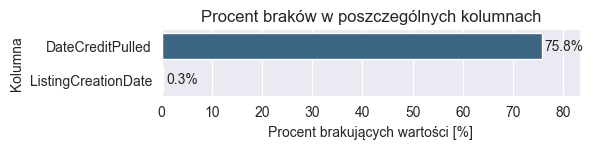

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Tabela z liczbą i procentem braków
missing_count = df.isna().sum()
missing_pct   = 100 * missing_count / len(df)

missing_df = (
    pd.DataFrame({
        'Liczba brakujących': missing_count,
        'Procent brakujących': missing_pct
    })
    .loc[lambda x: x['Liczba brakujących'] > 0]  # tylko kolumny z brakami
    .sort_values('Procent brakujących', ascending=False)
)

display(missing_df)

# 2) Wykres poziomy: procent braków w każdej kolumnie
plt.figure(figsize=(6, missing_df.shape[0] * 0.3 + 1))
sns.barplot(
    x='Procent brakujących',
    y=missing_df.index,
    data=missing_df.reset_index().rename(columns={'index':'Kolumna'}),
    palette='viridis'
)
plt.xlabel('Procent brakujących wartości [%]')
plt.ylabel('Kolumna')
plt.title('Procent braków w poszczególnych kolumnach')
plt.xlim(0, missing_df['Procent brakujących'].max() * 1.1)

# wypisanie wartości nad słupkami
for i, pct in enumerate(missing_df['Procent brakujących']):
    plt.text(pct + 0.5, i, f"{pct:.1f}%", va='center')

plt.tight_layout()
plt.show()

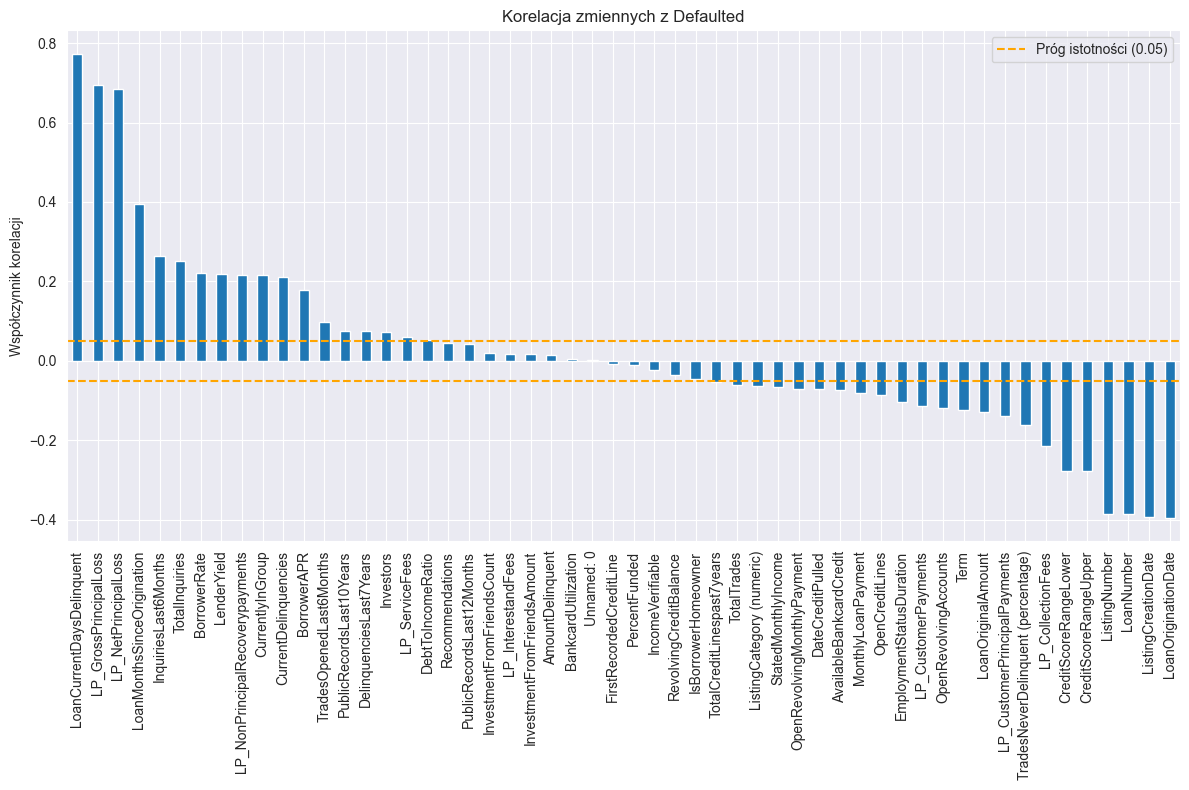

Zmienne do potencjalnego usunięcia (niska korelacja z Defaulted): ['Recommendations', 'PublicRecordsLast12Months', 'InvestmentFromFriendsCount', 'LP_InterestandFees', 'InvestmentFromFriendsAmount', 'AmountDelinquent', 'BankcardUtilization', 'Unnamed: 0', 'FirstRecordedCreditLine', 'PercentFunded', 'IncomeVerifiable', 'RevolvingCreditBalance', 'IsBorrowerHomeowner']


In [138]:
# Korelacje z targetem 'Defaulted'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_with_default = df[numeric_cols].corrwith(df['Defaulted']).sort_values(ascending=False)

# Wykres
plt.figure(figsize=(12, 8))
correlation_with_default.drop('Defaulted', errors='ignore').plot(kind='bar')
plt.title('Korelacja zmiennych z Defaulted')
plt.ylabel('Współczynnik korelacji')
plt.axhline(y=0.05, color='orange', linestyle='--', label='Próg istotności (0.05)')
plt.axhline(y=-0.05, color='orange', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# Lista zmiennych o niskiej korelacji
low_correlation_threshold = 0.05
low_correlation_vars = correlation_with_default[abs(correlation_with_default) < low_correlation_threshold].index.tolist()
print("Zmienne do potencjalnego usunięcia (niska korelacja z Defaulted):", low_correlation_vars)


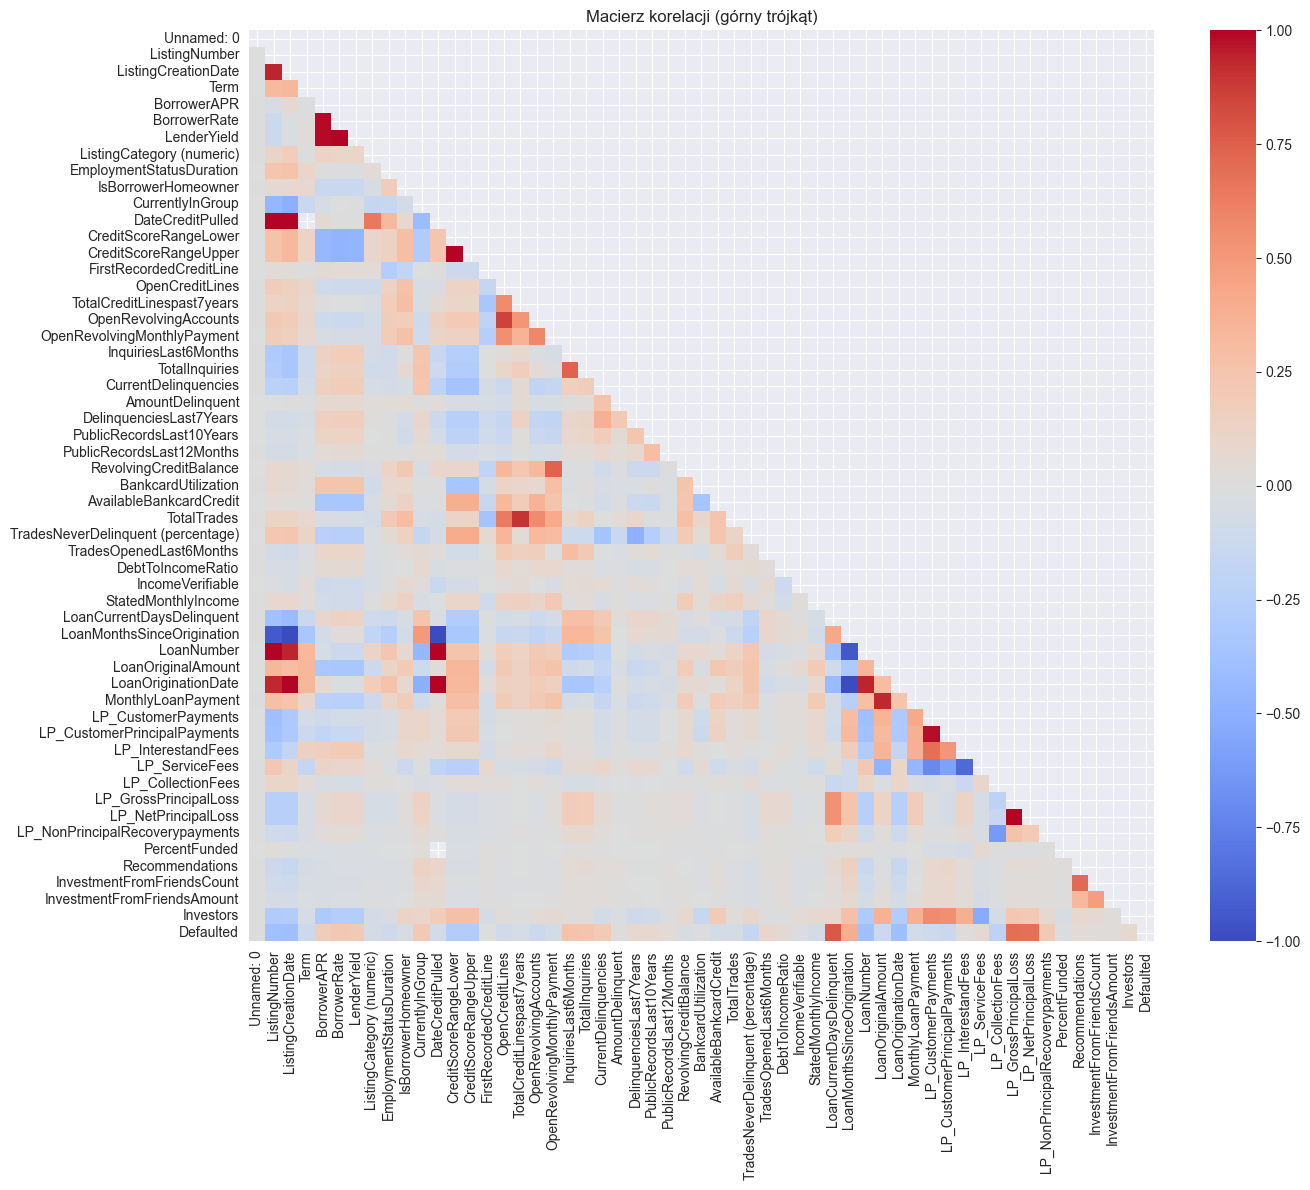

Pary zmiennych o wysokiej korelacji (powyżej 0.7):
CreditScoreRangeLower ↔ CreditScoreRangeUpper: 1.000
LoanMonthsSinceOrigination ↔ LoanOriginationDate: -1.000
ListingCreationDate ↔ LoanOriginationDate: 1.000
ListingCreationDate ↔ LoanMonthsSinceOrigination: -0.999
BorrowerRate ↔ LenderYield: 0.999
DateCreditPulled ↔ LoanOriginationDate: 0.999
DateCreditPulled ↔ LoanMonthsSinceOrigination: -0.998
ListingCreationDate ↔ DateCreditPulled: 0.998
DateCreditPulled ↔ LoanNumber: 0.995
ListingNumber ↔ LoanNumber: 0.995
ListingNumber ↔ DateCreditPulled: 0.995
LP_GrossPrincipalLoss ↔ LP_NetPrincipalLoss: 0.993
BorrowerAPR ↔ BorrowerRate: 0.990
BorrowerAPR ↔ LenderYield: 0.990
LP_CustomerPayments ↔ LP_CustomerPrincipalPayments: 0.977
LoanMonthsSinceOrigination ↔ LoanNumber: -0.943
LoanNumber ↔ LoanOriginationDate: 0.942
ListingCreationDate ↔ LoanNumber: 0.942
ListingNumber ↔ ListingCreationDate: 0.938
ListingNumber ↔ LoanMonthsSinceOrigination: -0.937
ListingNumber ↔ LoanOriginationDate: 0.937
L

In [139]:
# Macierz korelacji między zmiennymi
correlation_matrix = df[numeric_cols].corr()

# Wizualizacja (tylko górny trójkąt)
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Maska na górny trójkąt
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Macierz korelacji (górny trójkąt)')
plt.tight_layout()
plt.show()

high_corr_threshold = 0.7
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

print(f"Pary zmiennych o wysokiej korelacji (powyżej {high_corr_threshold}):")
for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} ↔ {var2}: {corr:.3f}")


In [140]:
print(f"Pary zmiennych o wysokiej korelacji (powyżej {high_corr_threshold}):")
for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} ↔ {var2}: {corr:.3f}")


Pary zmiennych o wysokiej korelacji (powyżej 0.7):
CreditScoreRangeLower ↔ CreditScoreRangeUpper: 1.000
LoanMonthsSinceOrigination ↔ LoanOriginationDate: -1.000
ListingCreationDate ↔ LoanOriginationDate: 1.000
ListingCreationDate ↔ LoanMonthsSinceOrigination: -0.999
BorrowerRate ↔ LenderYield: 0.999
DateCreditPulled ↔ LoanOriginationDate: 0.999
DateCreditPulled ↔ LoanMonthsSinceOrigination: -0.998
ListingCreationDate ↔ DateCreditPulled: 0.998
DateCreditPulled ↔ LoanNumber: 0.995
ListingNumber ↔ LoanNumber: 0.995
ListingNumber ↔ DateCreditPulled: 0.995
LP_GrossPrincipalLoss ↔ LP_NetPrincipalLoss: 0.993
BorrowerAPR ↔ BorrowerRate: 0.990
BorrowerAPR ↔ LenderYield: 0.990
LP_CustomerPayments ↔ LP_CustomerPrincipalPayments: 0.977
LoanMonthsSinceOrigination ↔ LoanNumber: -0.943
LoanNumber ↔ LoanOriginationDate: 0.942
ListingCreationDate ↔ LoanNumber: 0.942
ListingNumber ↔ ListingCreationDate: 0.938
ListingNumber ↔ LoanMonthsSinceOrigination: -0.937
ListingNumber ↔ LoanOriginationDate: 0.937
L

In [141]:
correlation_with_defaulted = df[numeric_cols].corrwith(df['Defaulted']).sort_values(ascending=False)

print(f"{'Zmienna 1':<30} {'Korelacja z Defaulted':<20} | {'Zmienna 2':<30} {'Korelacja z Defaulted':<20} | {'Korelacja między zmiennymi':<15}")
print('-'*110)

for var1, var2, corr in high_corr_pairs:
    corr_var1 = correlation_with_defaulted.get(var1, 0)
    corr_var2 = correlation_with_defaulted.get(var2, 0)
    print(f"{var1:<30} {corr_var1:< 20.3f} | {var2:<30} {corr_var2:< 20.3f} | {corr:<15.3f}")


Zmienna 1                      Korelacja z Defaulted | Zmienna 2                      Korelacja z Defaulted | Korelacja między zmiennymi
--------------------------------------------------------------------------------------------------------------
ListingNumber                  -0.385               | ListingCreationDate            -0.394               | 0.938          
ListingNumber                  -0.385               | DateCreditPulled               -0.072               | 0.995          
ListingNumber                  -0.385               | LoanMonthsSinceOrigination      0.395               | -0.937         
ListingNumber                  -0.385               | LoanNumber                     -0.387               | 0.995          
ListingNumber                  -0.385               | LoanOriginationDate            -0.395               | 0.937          
ListingCreationDate            -0.394               | DateCreditPulled               -0.072               | 0.998          
ListingC

In [142]:
# Podział zmiennych na kategorie
continuous_vars = []  # Zmienne ciągłe
discrete_ordered_vars = []  # Zmienne dyskretne uporządkowane
categorical_unordered_vars = []  # Zmienne kategoryczne nieuporządkowane

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        n_unique = df[col].nunique()
        # Zmienne z dużą liczbą unikalnych wartości są prawdopodobnie ciągłe
        if n_unique > 10 and n_unique / len(df) > 0.05:
            continuous_vars.append(col)
        else:
            # Zmienne dyskretne (ordered)
            discrete_ordered_vars.append(col)
    else:
        # Zmienne nieliczbowe - kategoryczne (unordered)
        categorical_unordered_vars.append(col)

print("Zmienne ciągłe:", continuous_vars)
print("Zmienne dyskretne (ordered):", discrete_ordered_vars)
print("Zmienne kategoryczne (unordered):", categorical_unordered_vars)


Zmienne ciągłe: ['Unnamed: 0', 'ListingNumber', 'BorrowerAPR', 'FirstRecordedCreditLine', 'AmountDelinquent', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'StatedMonthlyIncome', 'LoanNumber', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss']
Zmienne dyskretne (ordered): ['ListingCreationDate', 'Term', 'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'BankcardUtilization', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Mon

In [143]:
# 1. SPRAWDZENIE KOLUMN IDENTYFIKACYJNYCH
ident_columns = ['ListingKey', 'LoanKey', 'MemberKey']

unique_counts = {col: df[col].nunique() for col in ident_columns}
unique_percent = {col: df[col].nunique()/len(df)*100 for col in ident_columns}

print("1. ANALIZA KOLUMN IDENTYFIKACYJNYCH:")
print("\nLiczba unikalnych wartości:")
for col, count in unique_counts.items():
    print(f"{col}: {count} unikalnych wartości ({unique_percent[col]:.2f}% rekordów)")

1. ANALIZA KOLUMN IDENTYFIKACYJNYCH:

Liczba unikalnych wartości:
ListingKey: 112074 unikalnych wartości (97.62% rekordów)
LoanKey: 112074 unikalnych wartości (97.62% rekordów)
MemberKey: 90053 unikalnych wartości (78.44% rekordów)


In [144]:
print("\nZwiązek z Defaulted:")
for col in ident_columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        corr = df[col].corr(df['Defaulted'])
        print(f"{col}: korelacja z Defaulted = {corr:.4f}")
    else:
        default_rates = df.groupby(col)['Defaulted'].mean()
        var = default_rates.var()
        print(f"{col}: wariancja średnich wartości Defaulted = {var:.6f}")


Związek z Defaulted:
ListingKey: wariancja średnich wartości Defaulted = 0.128597
LoanKey: wariancja średnich wartości Defaulted = 0.128597
MemberKey: wariancja średnich wartości Defaulted = 0.135172


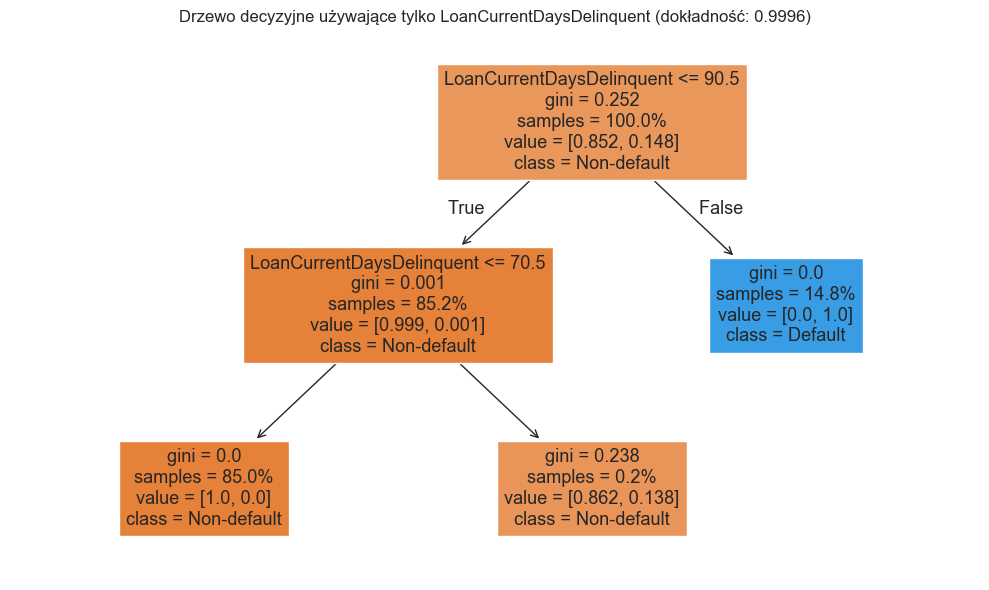


Dokładność klasyfikacji używając tylko LoanCurrentDaysDelinquent: 0.9996


In [145]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X = df[['LoanCurrentDaysDelinquent']]
y = df['Defaulted']

model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['LoanCurrentDaysDelinquent'], 
          class_names=['Non-default', 'Default'], proportion=True)
plt.title(f'Drzewo decyzyjne używające tylko LoanCurrentDaysDelinquent (dokładność: {accuracy:.4f})')
plt.tight_layout()
plt.show()

print(f"\nDokładność klasyfikacji używając tylko LoanCurrentDaysDelinquent: {accuracy:.4f}")




2. ANALIZA POTENCJALNEGO WYCIEKU DANYCH:

Korelacja LoanCurrentDaysDelinquent z Defaulted: 0.7737


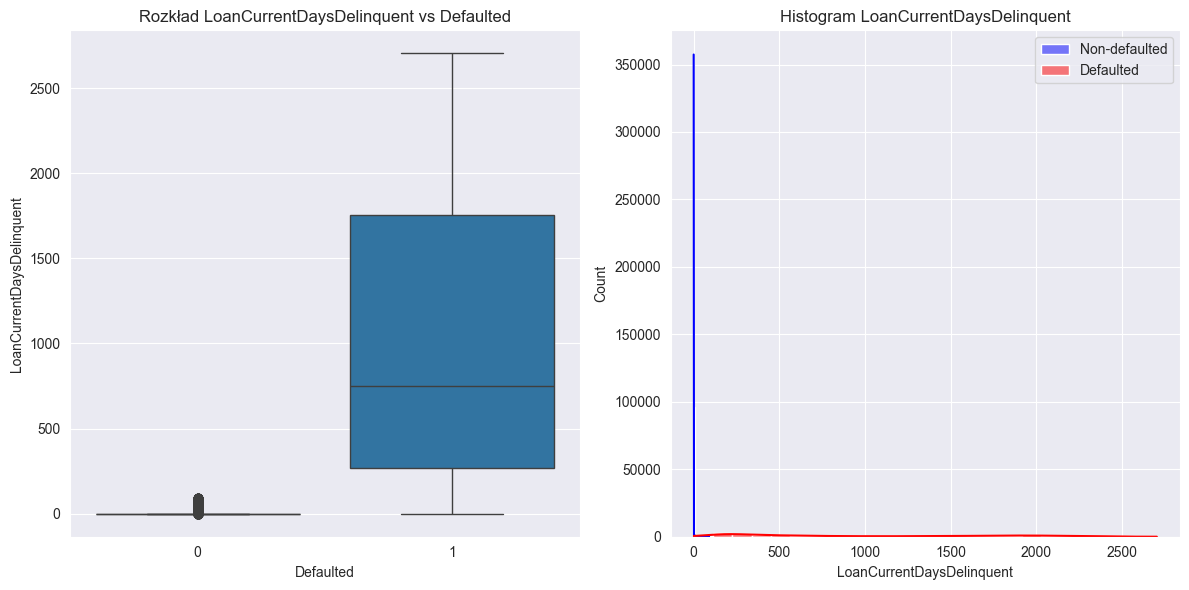

In [146]:
# 2. SPRAWDZENIE POTENCJALNEGO WYCIEKU DANYCH
print("\n\n2. ANALIZA POTENCJALNEGO WYCIEKU DANYCH:")

corr_delinq = df['LoanCurrentDaysDelinquent'].corr(df['Defaulted'])
print(f"\nKorelacja LoanCurrentDaysDelinquent z Defaulted: {corr_delinq:.4f}")

plt.figure(figsize=(12, 6))

# Podwykres 1: Rozkład wartości dla defaulted vs non-defaulted
plt.subplot(1, 2, 1)
sns.boxplot(x='Defaulted', y='LoanCurrentDaysDelinquent', data=df)
plt.title('Rozkład LoanCurrentDaysDelinquent vs Defaulted')
plt.ylabel('LoanCurrentDaysDelinquent')

# Podwykres 2: Histogram wartości LoanCurrentDaysDelinquent dla defaulted/non-defaulted
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['Defaulted']==0], x='LoanCurrentDaysDelinquent', color='blue', 
             alpha=0.5, label='Non-defaulted', kde=True)
sns.histplot(data=df[df['Defaulted']==1], x='LoanCurrentDaysDelinquent', color='red', 
             alpha=0.5, label='Defaulted', kde=True)
plt.title('Histogram LoanCurrentDaysDelinquent')
plt.xlabel('LoanCurrentDaysDelinquent')
plt.legend()

plt.tight_layout()
plt.show()

In [147]:
# Usuwanie zmiennych z wysoką korelacją między sobą - zostawiamy zmienną z wyższą korelacją z Defaulted
variables_to_drop_corr = [
    'ListingNumber',      # silnie skorelowany z LoanMonthsSinceOrigination (-0.937) i LoanNumber (0.995)
    'BorrowerAPR',        # silnie skorelowany z BorrowerRate (0.990) i LenderYield (0.990)
    'LenderYield',        # silnie skorelowany z BorrowerRate (0.999)
    'CreditScoreRangeLower', # idealnie skorelowany z CreditScoreRangeUpper (1.000)
    'OpenCreditLines',    # silnie skorelowany z OpenRevolvingAccounts (0.853)
    'TotalCreditLinespast7years', # silnie skorelowany z TotalTrades (0.905)
    'LP_NetPrincipalLoss' # silnie skorelowany z LP_GrossPrincipalLoss (0.993)
]


In [148]:
# Usuwanie zmiennej z wyciekiem danych (data leakage)
data_leakage_vars = [
    'LoanCurrentDaysDelinquent'  # dokładność drzewa decyzyjnego 0.9996
]


In [149]:
# Usuwanie zmiennych o niskiej korelacji z Defaulted (< 0.05)
low_corr_vars = [var for var in correlation_with_defaulted.index 
                if abs(correlation_with_defaulted[var]) < 0.05]

print("Zmienne o niskiej korelacji z Defaulted:")
print(low_corr_vars)


Zmienne o niskiej korelacji z Defaulted:
['Recommendations', 'PublicRecordsLast12Months', 'InvestmentFromFriendsCount', 'LP_InterestandFees', 'InvestmentFromFriendsAmount', 'AmountDelinquent', 'BankcardUtilization', 'Unnamed: 0', 'FirstRecordedCreditLine', 'PercentFunded', 'IncomeVerifiable', 'RevolvingCreditBalance', 'IsBorrowerHomeowner']


In [150]:
# Połączenie wszystkich list zmiennych do usunięcia
all_vars_to_drop = list(set(variables_to_drop_corr + data_leakage_vars + low_corr_vars))

# Usunięcie zmiennych
df_cleaned = df.drop(columns=all_vars_to_drop)

# Sprawdzenie rezultatu
print(f"Oryginalna liczba zmiennych: {df.shape[1]}")
print(f"Liczba zmiennych po usunięciu: {df_cleaned.shape[1]}")
print(f"Usunięto {df.shape[1] - df_cleaned.shape[1]} zmiennych")

# Zapisanie oczyszczonego zbioru danych
df_cleaned.to_csv('cleaned_data.csv', index=False)


Oryginalna liczba zmiennych: 63
Liczba zmiennych po usunięciu: 42
Usunięto 21 zmiennych


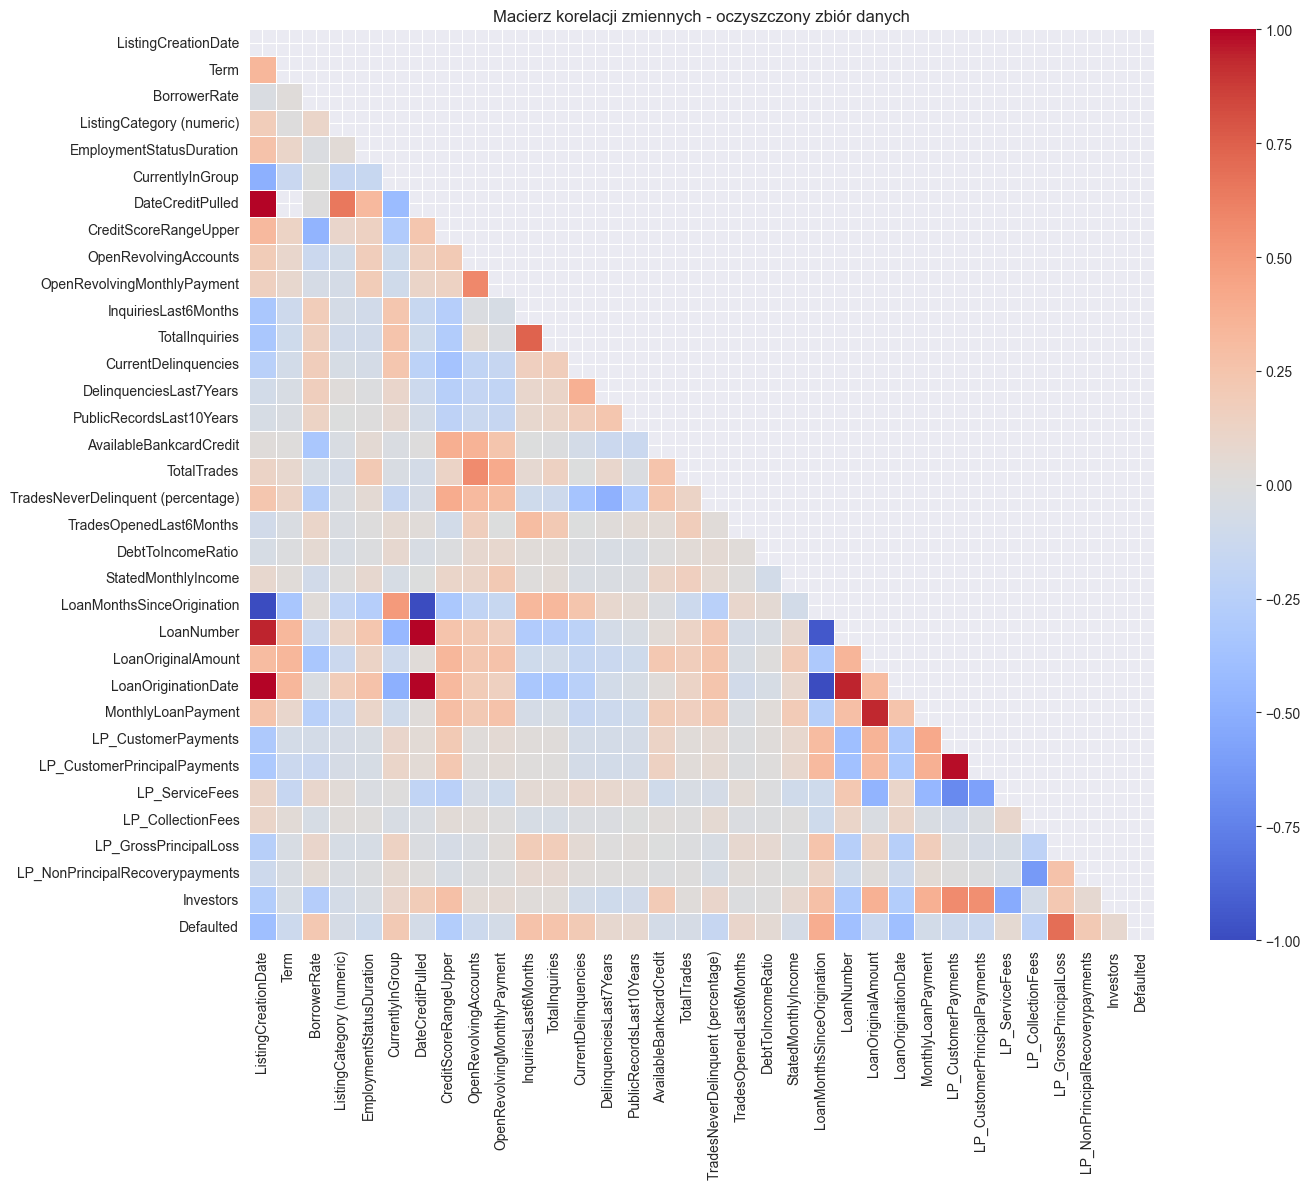

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Wczytanie oczyszczonego pliku CSV
file_path = 'cleaned_data.csv'
df_cleaned = pd.read_csv(file_path)

# Wybór zmiennych numerycznych do analizy korelacji
numeric_cols_cleaned = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Obliczenie macierzy korelacji
correlation_matrix_cleaned = df_cleaned[numeric_cols_cleaned].corr()

# Wizualizacja macierzy korelacji (górny trójkąt)
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix_cleaned, dtype=bool))
sns.heatmap(correlation_matrix_cleaned, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=False, linewidths=0.5)
plt.title('Macierz korelacji zmiennych - oczyszczony zbiór danych')
plt.tight_layout()
plt.show()


Wczytano oczyszczony zbiór danych

Znaleziono 14 par zmiennych o korelacji |r| > 0.7:

Zmienna 1                      Zmienna 2                       Korelacja
------------------------------------------------------------------------
LoanMonthsSinceOrigination     LoanOriginationDate                -1.000
ListingCreationDate            LoanOriginationDate                 1.000
ListingCreationDate            LoanMonthsSinceOrigination         -0.999
DateCreditPulled               LoanOriginationDate                 0.999
DateCreditPulled               LoanMonthsSinceOrigination         -0.998
ListingCreationDate            DateCreditPulled                    0.998
DateCreditPulled               LoanNumber                          0.995
LP_CustomerPayments            LP_CustomerPrincipalPayments        0.977
LoanMonthsSinceOrigination     LoanNumber                         -0.943
LoanNumber                     LoanOriginationDate                 0.942
ListingCreationDate            LoanNu

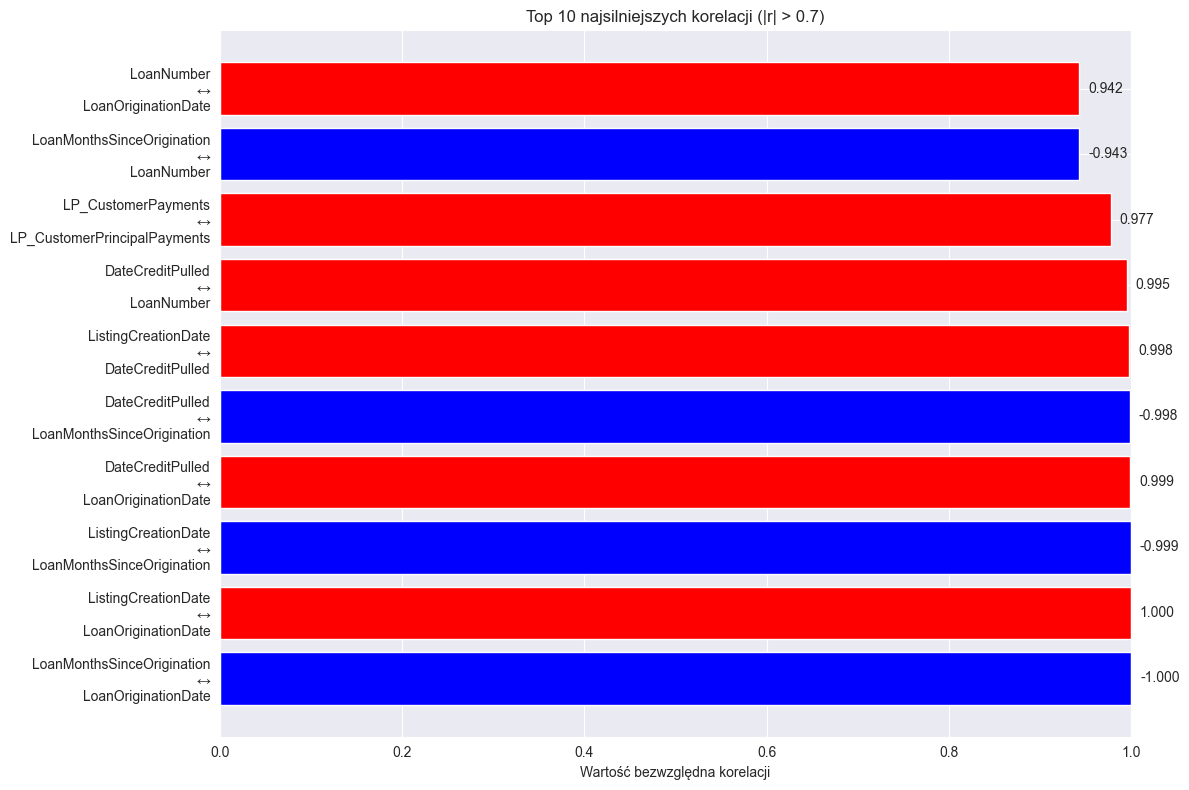

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('cleaned_data.csv')
    print("Wczytano oczyszczony zbiór danych")
except FileNotFoundError:
    try:
        df = pd.read_csv('filled_missings_df.csv')
        print("Wczytano oryginalny zbiór danych")
    except FileNotFoundError:
        print("Używam istniejącego DataFrame")

# Wybór zmiennych numerycznych
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Obliczenie macierzy korelacji
corr_matrix = df[numeric_cols].corr()

# Funkcja do znalezienia par zmiennych o wysokiej korelacji
def find_correlated_pairs(correlation_matrix, threshold=0.7):
    corr_unstack = correlation_matrix.unstack()
    corr_unstack = corr_unstack[corr_unstack.index.get_level_values(0) != corr_unstack.index.get_level_values(1)]
    
    # Filtrowanie par o wartości bezwzględnej korelacji powyżej progu
    high_corr = corr_unstack[abs(corr_unstack) > threshold]
    
    # Usunięcie duplikatów (A-B i B-A to ta sama para)
    pairs_seen = set()
    unique_pairs = []
    
    for idx, corr_value in high_corr.items():
        var1, var2 = idx
        # Sortowanie zmiennych, aby uniknąć duplikatów
        pair = tuple(sorted([var1, var2]))
        if pair not in pairs_seen:
            pairs_seen.add(pair)
            unique_pairs.append((var1, var2, corr_value))
    
    # Sortowanie według wartości bezwzględnej korelacji (malejąco)
    return sorted(unique_pairs, key=lambda x: abs(x[2]), reverse=True)

# Znalezienie par o wysokiej korelacji
threshold = 0.7
correlated_pairs = find_correlated_pairs(corr_matrix, threshold)

# Wyświetlenie wyników
print(f"\nZnaleziono {len(correlated_pairs)} par zmiennych o korelacji |r| > {threshold}:\n")
print(f"{'Zmienna 1':<30} {'Zmienna 2':<30} {'Korelacja':>10}")
print("-" * 72)
for var1, var2, corr in correlated_pairs:
    print(f"{var1:<30} {var2:<30} {corr:>10.3f}")

# Wizualizacja najsilniejszych korelacji (top 10)
if len(correlated_pairs) > 0:
    top_n = min(10, len(correlated_pairs))
    top_pairs = correlated_pairs[:top_n]
    
    # Przygotowanie danych do wykresu
    pair_names = [f"{var1}\n↔\n{var2}" for var1, var2, _ in top_pairs]
    corr_values = [corr for _, _, corr in top_pairs]
    
    # Kolory w zależności od znaku korelacji
    colors = ['red' if x > 0 else 'blue' for x in corr_values]
    
    # Tworzenie wykresu
    plt.figure(figsize=(12, 8))
    plt.barh(pair_names, [abs(x) for x in corr_values], color=colors)
    plt.xlabel('Wartość bezwzględna korelacji')
    plt.title(f'Top {top_n} najsilniejszych korelacji (|r| > {threshold})')
    plt.xlim(0, 1)
    
    # Dodanie etykiet wartości
    for i, v in enumerate(corr_values):
        plt.text(abs(v) + 0.01, i, f"{v:.3f}", va='center')
    
    plt.tight_layout()
    plt.show()


In [153]:
try:
    df_cleaned = pd.read_csv('cleaned_data.csv')
    print("Wczytano oczyszczony zbiór danych")
except:
    print("Używam aktualnego DataFrame")

# Lista par zmiennych o wysokiej korelacji z wykresu
# Format: [zmienna_do_usunięcia, zmienna_do_zachowania, korelacja]
high_corr_pairs = [
    ['LP_CustomerPrincipalPayments', 'LP_CustomerPayments', 0.977],  # Zachowuję LP_CustomerPayments jako bardziej ogólną
    ['LoanNumber', 'LoanMonthsSinceOrigination', 0.943],  # Zachowuję LoanMonthsSinceOrigination jako bardziej interpretowalne
    ['MonthlyLoanPayment', 'LoanOriginalAmount', 0.932],  # Zachowuję LoanOriginalAmount jako zmienną bazową
    ['TotalInquiries', 'InquiriesLast6Months', 0.738],    # Zachowuję InquiriesLast6Months jako bardziej aktualną
    ['LP_ServiceFees', 'LP_CustomerPayments', -0.706]     # Zachowuję LP_CustomerPayments (już wybrane wcześniej)
]

# Zmienne pełniące role unikalnych identyfikatorów
user_vars_to_remove = ['ListingKey', 'LoanKey', 'MemberKey']
df_cleaned = df_cleaned.drop(columns=user_vars_to_remove)

vars_to_remove = [pair[0] for pair in high_corr_pairs]

# Informacja o usuwanych zmiennych
print("Zmienne do usunięcia (wysoka korelacja między parami):")
for var, keep_var, corr in high_corr_pairs:
    print(f"- Usuwam: {var} (zachowuję {keep_var}, korelacja: {corr:.3f})")

present_vars = [var for var in vars_to_remove if var in df_cleaned.columns]
missing_vars = [var for var in vars_to_remove if var not in df_cleaned.columns]

if missing_vars:
    print("\nUwaga! Następujące zmienne nie zostały znalezione w danych:")
    for var in missing_vars:
        print(f"- {var}")
    print("Usunięte zostaną tylko zmienne obecne w danych.")

df_cleaned_final = df_cleaned.drop(columns=present_vars)

# Podsumowanie
print(f"\nLiczba zmiennych przed usunięciem: {df_cleaned.shape[1]}")
print(f"Liczba zmiennych po usunięciu: {df_cleaned_final.shape[1]}")
print(f"Usunięto {len(present_vars)} zmiennych")

df_cleaned_final.to_csv('filled_missings_df_final.csv', index=False)
print("\nZapisano oczyszczone dane do 'filled_missings_df_final.csv'")


Wczytano oczyszczony zbiór danych
Zmienne do usunięcia (wysoka korelacja między parami):
- Usuwam: LP_CustomerPrincipalPayments (zachowuję LP_CustomerPayments, korelacja: 0.977)
- Usuwam: LoanNumber (zachowuję LoanMonthsSinceOrigination, korelacja: 0.943)
- Usuwam: MonthlyLoanPayment (zachowuję LoanOriginalAmount, korelacja: 0.932)
- Usuwam: TotalInquiries (zachowuję InquiriesLast6Months, korelacja: 0.738)
- Usuwam: LP_ServiceFees (zachowuję LP_CustomerPayments, korelacja: -0.706)

Liczba zmiennych przed usunięciem: 39
Liczba zmiennych po usunięciu: 34
Usunięto 5 zmiennych

Zapisano oczyszczone dane do 'filled_missings_df_final.csv'


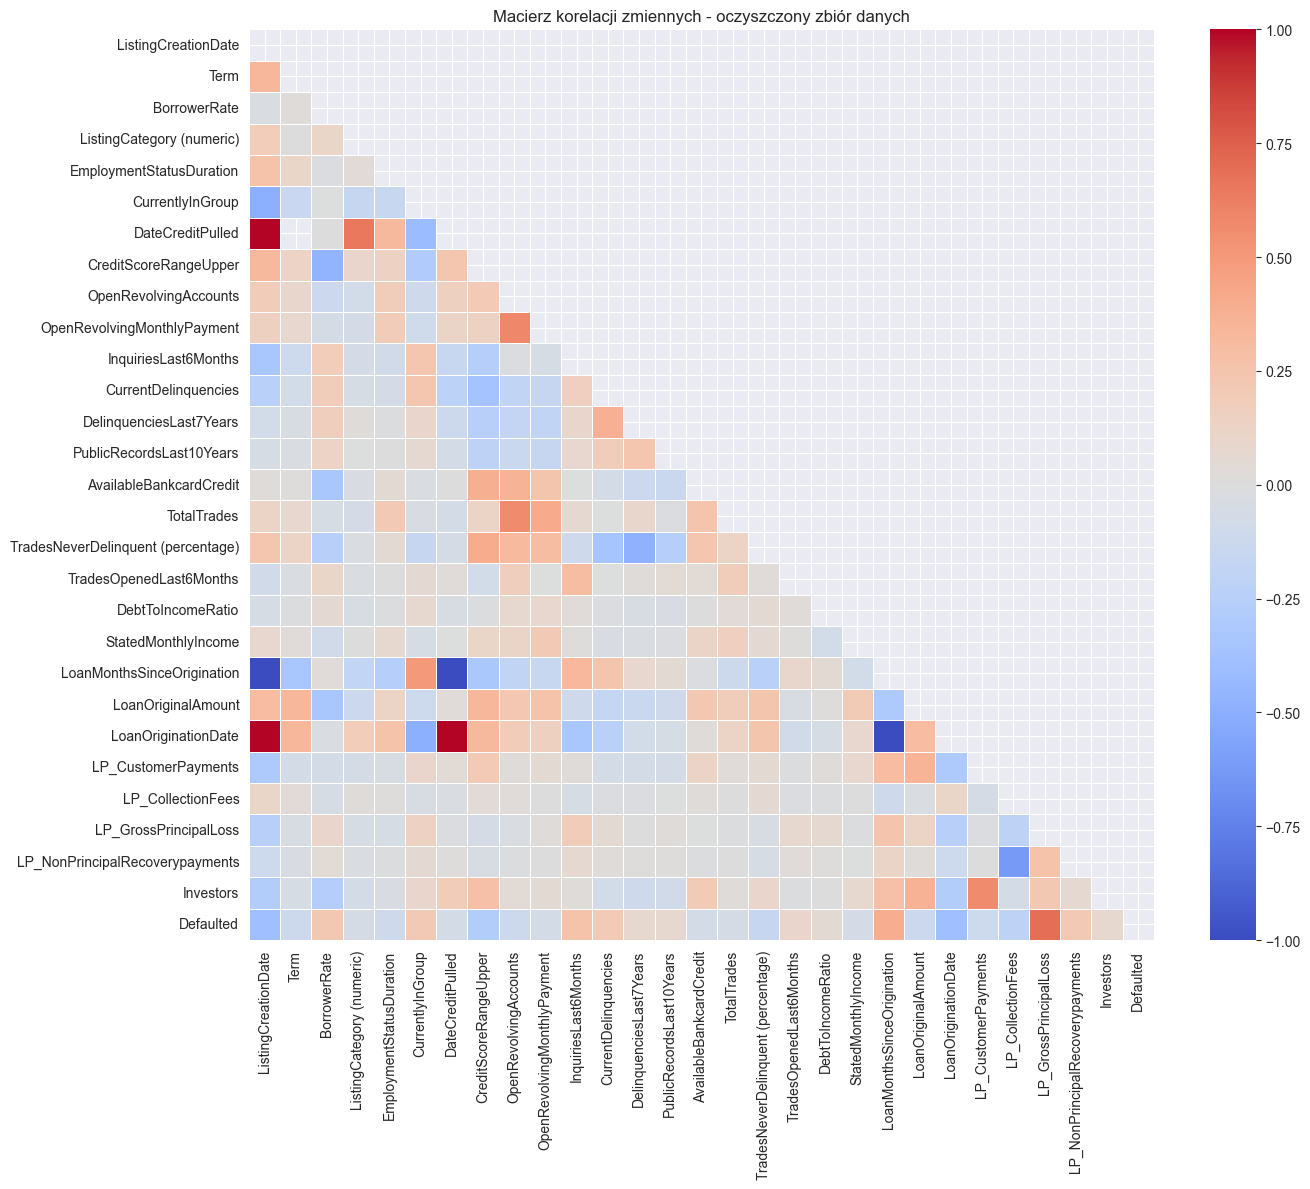

In [154]:
# Wczytanie oczyszczonego pliku CSV
file_path = 'filled_missings_df_final.csv'
df_cleaned = pd.read_csv(file_path)

# Wybór zmiennych numerycznych do analizy korelacji
numeric_cols_cleaned = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Obliczenie macierzy korelacji
correlation_matrix_cleaned = df_cleaned[numeric_cols_cleaned].corr()

# Wizualizacja macierzy korelacji (górny trójkąt)
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix_cleaned, dtype=bool))
sns.heatmap(correlation_matrix_cleaned, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=False, linewidths=0.5)
plt.title('Macierz korelacji zmiennych - oczyszczony zbiór danych')
plt.tight_layout()
plt.show()


In [155]:
df_cleaned

,ListingCreationDate,Term,LoanStatus,BorrowerRate,ListingCategory (numeric),BorrowerState,EmploymentStatus,EmploymentStatusDuration,CurrentlyInGroup,DateCreditPulled,...,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,LP_CustomerPayments,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NonPrincipalRecoverypayments,Investors,Defaulted
0,13751.0,36,Completed,0.1580,0,CO,Self-employed,2.0,1,13751.0,...,78,9425,13768,Q3 2007,11396.1400,0.0,0.0,0.0,258,0
1,16128.0,36,Current,0.0920,2,CO,Employed,44.0,0,NaN,...,0,10000,16132,Q1 2014,0.0000,0.0,0.0,0.0,1,0
2,13518.0,36,Completed,0.2750,0,GA,Not available,0.0,1,13515.0,...,86,3001,13530,Q1 2007,4186.6300,0.0,0.0,0.0,41,0
3,15635.0,36,Current,0.0974,16,GA,Employed,113.0,0,NaN,...,16,10000,15645,Q4 2012,5143.2000,0.0,0.0,0.0,158,0
4,15962.0,36,Current,0.2085,2,MN,Employed,44.0,0,NaN,...,6,15000,15968,Q3 2013,2819.8500,0.0,0.0,0.0,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114800,15809.0,36,Current,0.1864,1,IL,Employed,246.0,0,NaN,...,11,10000,15817,Q2 2013,3647.4000,0.0,0.0,0.0,1,0
114801,15281.0,36,FinalPaymentInProgress,0.1110,7,PA,Employed,21.0,0,NaN,...,28,2000,15285,Q4 2011,2330.5500,0.0,0.0,0.0,22,0
114802,16052.0,60,Current,0.2150,1,TX,Employed,84.0,0,NaN,...,3,10000,16062,Q4 2013,546.7000,0.0,0.0,0.0,119,0
114803,15292.0,60,Completed,0.2605,2,GA,Full-time,94.0,0,NaN,...,28,15000,15299,Q4 2011,21122.5600,0.0,0.0,0.0,274,0


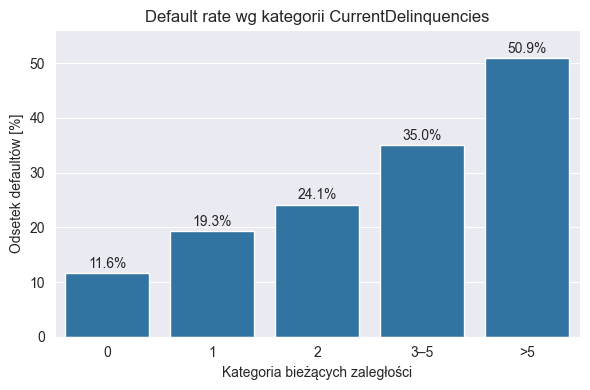

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Kategoryzacja CurrentDelinquencies
bins = [-1, 0, 1, 2, 5, df['CurrentDelinquencies'].max()]
labels = ['0', '1', '2', '3–5', '>5']
df['Delinq_cat'] = pd.cut(df['CurrentDelinquencies'], bins=bins, labels=labels)

# 2) Obliczenie default rate w każdej kategorii
cat_rates = df.groupby('Delinq_cat')['Defaulted'].mean() * 100  # w %

# 3) Wykres słupkowy default rate
plt.figure(figsize=(6,4))
sns.barplot(x=cat_rates.index, y=cat_rates.values, color='C0')
plt.xlabel('Kategoria bieżących zaległości')
plt.ylabel('Odsetek defaultów [%]')
plt.title('Default rate wg kategorii CurrentDelinquencies')
plt.ylim(0, cat_rates.max() * 1.1)  # troszkę przestrzeni nad słupkami
for i, v in enumerate(cat_rates.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')  # wartości nad słupkami
plt.tight_layout()
plt.show()